# NYC COVID-19 Statistics
    by borough
    by zip
    by age 
    by sex
    
    source: https://github.com/nychealth/coronavirus-data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [98]:
path = 'C:/Users/justi/Documents/COVID/covid-data-archive/'


In [126]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

def mdyyToDate(mdyy,mode='date'):
    i1=mdyy.find('/')
    i2=mdyy.find('/',i1+1)
    m=int(mdyy[:i1])
    d=int(mdyy[i1+1:i2])
    yyyy=2000+int(mdyy[i2+1:])
    
    date=datetime.date(yyyy,m,d)
    
    if mode=='np.datetime64':
        date=np.datetime64(date)
        
    elif mode=='datetime':
        date=datetime.datetime(yyyy,m,d,0,0,0)
        
    return date

In [134]:
filepaths =getListOfFiles(path)

datadict={}
for i in filepaths:
    filename=i[61:]
    tmp=pd.read_csv(i)P!
    if filename in datadict:
        datadict[filename]=pd.concat([datadict[filename],tmp])
    else:
        datadict[filename]=tmp

for file in datadict:
    try:
        del datadict[file]['Unnamed: 0']
    except:()
        
dfzip=datadict['tests-by-zcta.csv']
datadict['case-hosp-death.csv']['Date']=datadict['case-hosp-death.csv']['DATE_OF_INTEREST'].apply(lambda datestr:mdyyToDate(datestr))
dfcases=datadict['case-hosp-death.csv'].fillna(0).groupby('Date').max().reset_index(drop=False).sort_values(by='Date')
#dfcases['Date']=dfcases['DATE_OF_INTEREST'].apply(lambda date : )

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [136]:
dfcases.tail()

,Date,CASE_COUNT,DATE_OF_INTEREST,DEATH_COUNT,HOSPITALIZED_CASE_COUNT,HOSPITALIZED_COUNT,NEW_COVID_CASE_COUNT
52,2020-04-23,2455.0,4/23/20,203.0,131.0,271.0,2360.0
53,2020-04-24,1958.0,4/24/20,145.0,60.0,264.0,1625.0
54,2020-04-25,1050.0,4/25/20,80.0,10.0,94.0,300.0
55,2020-04-26,354.0,4/26/20,68.0,0.0,16.0,23.0
56,2020-04-27,27.0,4/27/20,10.0,0.0,1.0,0.0


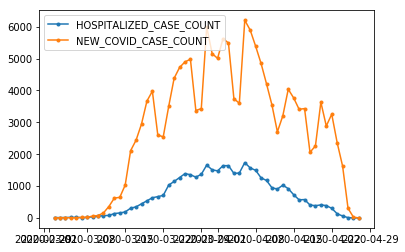

In [138]:
plt.plot(dfcases['Date'].astype(datetime.date),dfcases['HOSPITALIZED_CASE_COUNT'],'.-')
plt.plot(dfcases['Date'].astype(datetime.date),dfcases['NEW_COVID_CASE_COUNT'],'.-')
plt.legend()

In [104]:
for key in datadict:
    print(key)

boro.csv
by-age.csv
by-sex.csv
case-hosp-death.csv
tests-by-zcta.csv
summary.csv


In [105]:
datadict['tests-by-zcta.csv'].head()

,MODZCTA,Positive,Total,date,zcta_cum.perc_pos
0,NaN,1934,2082,2020-04-12,92.89
1,10001.0,211,448,2020-04-12,47.10
2,10002.0,539,1024,2020-04-12,52.64
3,10003.0,279,662,2020-04-12,42.15
4,10004.0,23,59,2020-04-12,38.98


In [106]:
df_tmp

,MODZCTA,Positive,Total,date,zcta_cum.perc_pos,lag_positive,new_positive
109,11221.0,641,1061,2020-04-12,60.41,NaN,NaN
109,11221.0,652,1083,2020-04-13,60.20,641.0,11.0
109,11221.0,683,1139,2020-04-14,59.96,652.0,31.0
109,11221.0,698,1169,2020-04-15,59.71,683.0,15.0
109,11221.0,740,1261,2020-04-16,58.68,698.0,42.0
109,11221.0,801,1410,2020-04-19,56.81,740.0,61.0
109,11221.0,832,1501,2020-04-21,55.43,801.0,31.0
109,11221.0,843,1519,2020-04-22,55.50,832.0,11.0
109,11221.0,878,1635,2020-04-23,53.70,843.0,35.0
109,11221.0,938,1782,2020-04-25,52.64,878.0,60.0


C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


13
13


C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


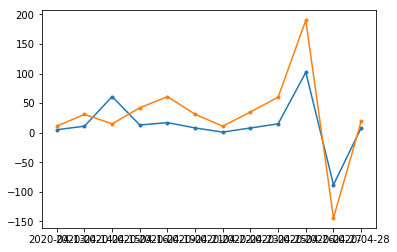

In [107]:
dfzip=datadict['tests-by-zcta.csv']

the_zipcode=10019
df_tmp = dfzip[dfzip['MODZCTA']==the_zipcode]
df_tmp['lag_positive']=df_tmp['Positive'].shift(1)
df_tmp['new_positive'] = df_tmp['Positive']-df_tmp['lag_positive']
plt.plot(df_tmp['date'],df_tmp['new_positive'],'.-')

dfzip=datadict['tests-by-zcta.csv']

the_zipcode=11221
df_tmp = dfzip[dfzip['MODZCTA']==the_zipcode]
df_tmp['lag_positive']=df_tmp['Positive'].shift(1)
df_tmp['new_positive'] = df_tmp['Positive']-df_tmp['lag_positive']
plt.plot(df_tmp['date'],df_tmp['new_positive'],'.-')

C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\justi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


13


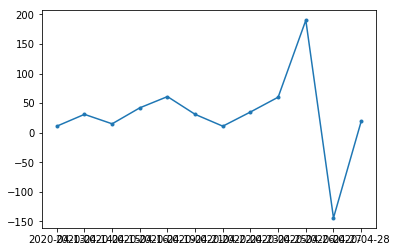

In [108]:
dfzip=datadict['tests-by-zcta.csv']

the_zipcode=11221
df_tmp = dfzip[dfzip['MODZCTA']==the_zipcode]
df_tmp['lag_positive']=df_tmp['Positive'].shift(1)
df_tmp['new_positive'] = df_tmp['Positive']-df_tmp['lag_positive']
print(len(df_tmp))
plt.plot(df_tmp['date'],df_tmp['new_positive'],'.-')

In [32]:
plt.plot()

,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,date
0,The Bronx,22709,1542.76,2020-04-12
1,Brooklyn,27462,1011.38,2020-04-12
2,Manhattan,13431,713.36,2020-04-12
3,Queens,32749,1308.43,2020-04-12
4,Staten Island,8004,1598.42,2020-04-12
5,Citywide,104410,NaN,2020-04-12
0,The Bronx,23352,1586.38,2020-04-13
1,Brooklyn,28035,1032.43,2020-04-13
2,Manhattan,13705,727.84,2020-04-13
3,Queens,33468,1336.59,2020-04-13


In [10]:
getListOfFiles(path)

['C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-12_boro.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-12_by-age.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-12_by-sex.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-12_case-hosp-death.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-12_tests-by-zcta.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-13_boro.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-13_by-age.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-13_by-sex.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-13_case-hosp-death.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-13_tests-by-zcta.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-14_boro.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-14_by-age.csv',
 'C:/Users/justi/Documents/COVID/covid-data-archive/2020-04-14